In [ ]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd

auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

worksheet=gc.open('stdata').sheet1
data = worksheet.get_all_values()
df = pd.DataFrame(data[1:], columns=data[0])
print(df)

    in  out
0    1   11
1    2   21
2    3   31
3    4   41
4    5   51
5    6   61
6    7   71
7    8   81
8    9   91
9   10  101
10  11  111
11  12  121
12  13  131
13  14  141
14  15  151
15  16  161
16  17  171
17  18  181
18  19  191
19  20  201
20  21  211
21  22  221
22  23  231
23  24  241
24  25  251
25  26  261
26  27  271
27  28  281
28  29  291
29  30  301
30  31  311
31  32  321
32  33  331
33  34  341
34  35  351
35  36  361
36  37  371
37  38  381
38  39  391
39  40  401
40  41  411
41  42  421
42  43  431
43  44  441
44  45  451
45  46  461
46  47  471
47  48  481
48  49  491
49  50  501


In [ ]:
df=df.astype({'in':float,'out':float})
x=df[['in']].values
y=df[['out']].values


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=33)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler()
Scaler.fit(x_train)
x_train1=Scaler.transform(x_train)



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

m1=Sequential([
Dense(units=9,activation='relu',input_shape=[1]),
Dense(units=9,activation='relu'),
Dense(units=9,activation='relu'),
Dense(units=1)])

m1.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 9)                   │              18 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 9)                   │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              10 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 208 (832.00 B)

 Trainable params: 208 (832.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
m1.compile(optimizer='rmsprop',loss='mse')


In [ ]:
m1.fit(x_train1,y_train,epochs=2000)

Epoch 1/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 321ms/step - loss: 86349.3672
Epoch 2/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 84279.8906  
Epoch 3/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 85229.5078 
Epoch 4/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 86146.5156 
Epoch 5/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 85203.2500
Epoch 6/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 86240.1875 
Epoch 7/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 85662.0703 
Epoch 8/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 85748.3125 
Epoch 9/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 85826.6953 
Epoch 10/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 86190.2188 
Epoch 11/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 84423.6328 
Epoch 12/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 86234.8047 
Epoch 13/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 86168.7188 
Epoch 14/2000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 85222.3750 
Epoch 15/2000

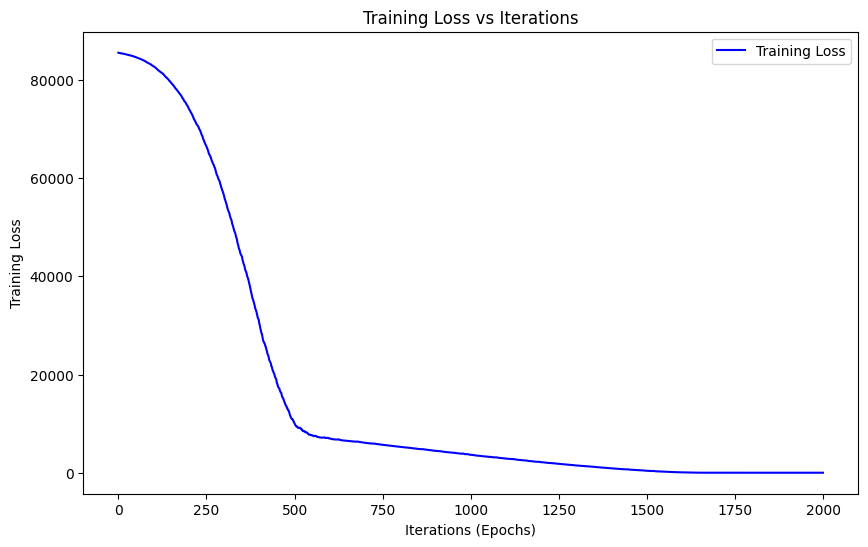

In [19]:
history=m1.history
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.title('Training Loss vs Iterations')
plt.xlabel('Iterations (Epochs)')
plt.ylabel('Training Loss')

plt.legend()

plt.show()

In [20]:
xtrain1=Scaler.transform(x_test)
m1.evaluate(xtrain1,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - loss: 1.6184


1.6183596849441528

In [21]:
n=[[30]]
x=Scaler.transform(n)
m1.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


array([[301.14215]], dtype=float32)